In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
df=pd.read_csv("./diabetes.csv")

In [5]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
y=df["Outcome"]
X=df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.30,
                                                  random_state=42)

In [7]:
rf_model= RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**MOdel**

In [8]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

**Model Tuning**

In [0]:
rf=RandomForestClassifier()

In [0]:
rf_params={"n_estimators":[100,200,500,1000],
           "max_features":[3,5,7,8],
           "min_samples_split":[2,5,10,20]}

In [14]:
rf_cv_model=GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  8.0min finished


In [15]:
rf_cv_model.best_params_

{'max_features': 7, 'min_samples_split': 5, 'n_estimators': 100}

In [0]:
#final model
rf_tuned=RandomForestClassifier(max_features=7, min_samples_split=5, n_estimators=100).fit(X_train, y_train)

In [0]:
y_pred=rf_tuned.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.7445887445887446

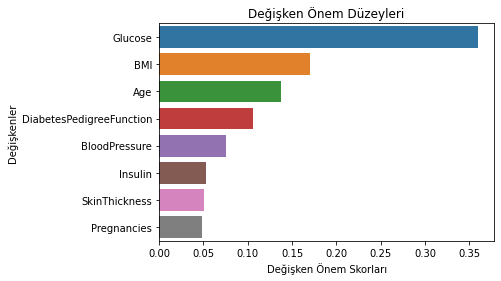

In [20]:
#değişken önem düzeyleri
#mümkün olduğunca az değişkenle model kurma eğiliminde olunacağından değişkenlerin önem düzeylerini görme ihtiyacı olacaktır. 
feature_imp=pd.Series(rf_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()